2.3935087188522495


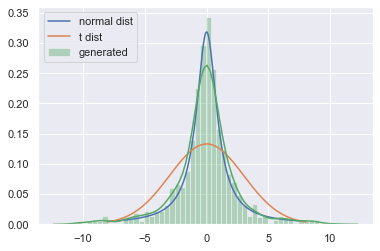

15.898763418197632


In [97]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import time

sns.set()

start = time.time()

df = 1
mu = 0
sigma = 3
num_samples = 1000

# Define target pdf
def f(x): 
    return st.t(df).pdf(x)
    
# Define candidate pdf
def g(x):
    return st.norm(mu,sigma).pdf(x)
 

x = np.linspace(-8, 8, 1000)
c = max(f(x)/g(x))
print(c)
#c = 2.0001


def rejection_sampling(num_samples=100,chat=1):
    samples = []
    i = 0
    chat = chat
    while i in range(num_samples):
        z = np.random.normal(mu,sigma,1) # Simulate a sample from candidate pdf
        u = np.random.uniform(0, 1,1)
        if u <= f(z)/(chat*g(z)):
            samples.append(z)
            i = i+1
        chat = max(chat,f(z)/(chat*g(z)))

    return np.array(samples)

figure,ax = plt.subplots()
ax.plot(x, f(x),label='normal dist')
ax.plot(x, g(x),label='t dist')
#plt.show()

s = rejection_sampling(num_samples,c)
sns.distplot(s,label='generated')
plt.legend(loc="upper left")
plt.show()

end = time.time()
print(end - start)